In [18]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px

In [19]:
class colorss:
    yellows=['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404','#a70000','#ff5252','#ff7b7b','#ffbaba']
    greens=['#ffffd4','#fee391','#fec44f','#fe9929','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#005a32']
cmaps=['flare','icefire','bwr_r','Accent','Spectral','RdGy','afmhot_r','afmhot','inferno','seismic','vlag','vlag_r']

In [20]:
df=pd.read_csv('Crop Production data.csv')

In [21]:
df

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arecanut    1254.0      2000.0  
1       Other Kharif pulses       2.0         1.0  
2                      Rice     102.0       321.0  
3                    Banana     176.0       641.0  
4                 Cashewnut     720.0       165.0  
...                     ...       ...         ...  
246086                 Rice     306.0       801.0  
246087              Sesamum     627.0       463.0  
246088            Sugarcane     324.0     16250.0  
246089                 Rice  279151.0    597899.0  
246090              Sesamum     175.0        88.0  

[246091 rows x 7 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [23]:
df.describe().T

count           mean           std      min     25%     50%  \
Crop_Year   246091.0    2005.643018  4.952164e+00  1997.00  2002.0  2006.0   
Area        246091.0   12002.820864  5.052340e+04     0.04    80.0   582.0   
Production  242361.0  582503.442251  1.706581e+07     0.00    88.0   729.0   

               75%           max  
Crop_Year   2010.0  2.015000e+03  
Area        4392.0  8.580100e+06  
Production  7023.0  1.250800e+09

In [24]:
df.describe(include='object')

State_Name District_Name       Season    Crop
count          246091        246091       246091  246091
unique             33           646            6     124
top     Uttar Pradesh       BIJAPUR  Kharif         Rice
freq            33306           945        95951   15104

In [25]:

state_counts =df['State_Name'].value_counts()
state_to_drop = state_counts[state_counts < 100].index.tolist()
df_filtered = df[~df['State_Name'].isin(state_to_drop)]
df = df_filtered.reset_index(drop=True)

In [26]:
df

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
245996                  West Bengal       PURULIA       2014  Summer        
245997                  West Bengal       PURULIA       2014  Summer        
245998                  West Bengal       PURULIA       2014  Whole Year    
245999                  West Bengal       PURULIA       2014  Winter        
246000                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arecanut    1254.0      2000.0  
1       Other Kharif pulses       2.0         1.0  
2                      Rice     102.0       321.0  
3                    Banana     176.0       641.0  
4                 Cashewnut     720.0       165.0  
...                     ...       ...         ...  
245996                 Rice     306.0       801.0  
245997              Sesamum     627.0       463.0  
245998            Sugarcane     324.0     16250.0  
245999                 Rice  279151.0    597899.0  
246000              Sesamum     175.0        88.0  

[246001 rows x 7 columns]

In [27]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3729
dtype: int64

In [28]:
from sklearn.impute import SimpleImputer
column_with_missing_values = 'Production'
imputer = SimpleImputer(strategy='mean')
df[column_with_missing_values] = imputer.fit_transform(df[[column_with_missing_values]])
print("Number of missing values after imputation:", df[column_with_missing_values].isnull().sum())


Number of missing values after imputation: 0


In [29]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [30]:
datacorr=df.copy()

In [31]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

<Axes: >

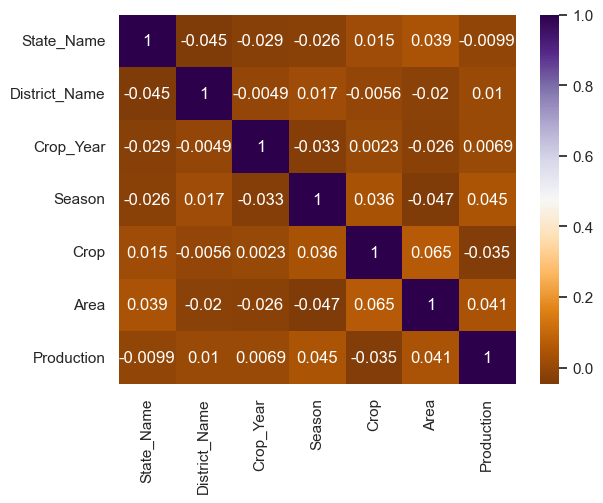

In [32]:
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

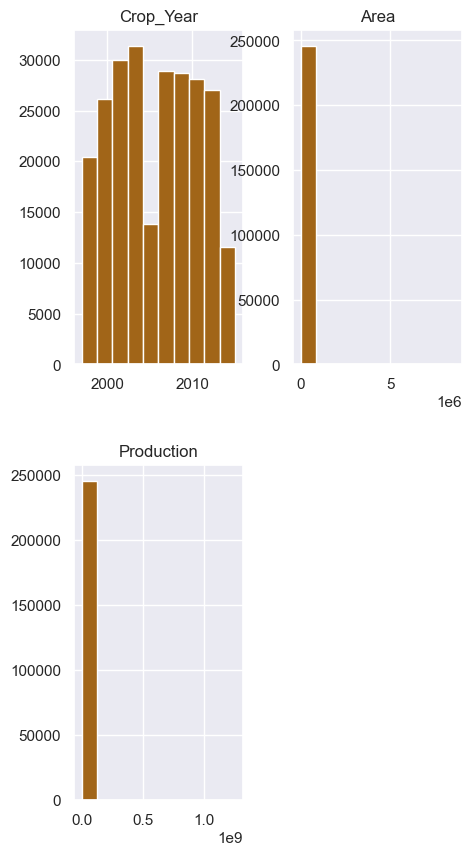

In [33]:
sns.set(palette='BrBG')
df.hist(figsize=(5,10));

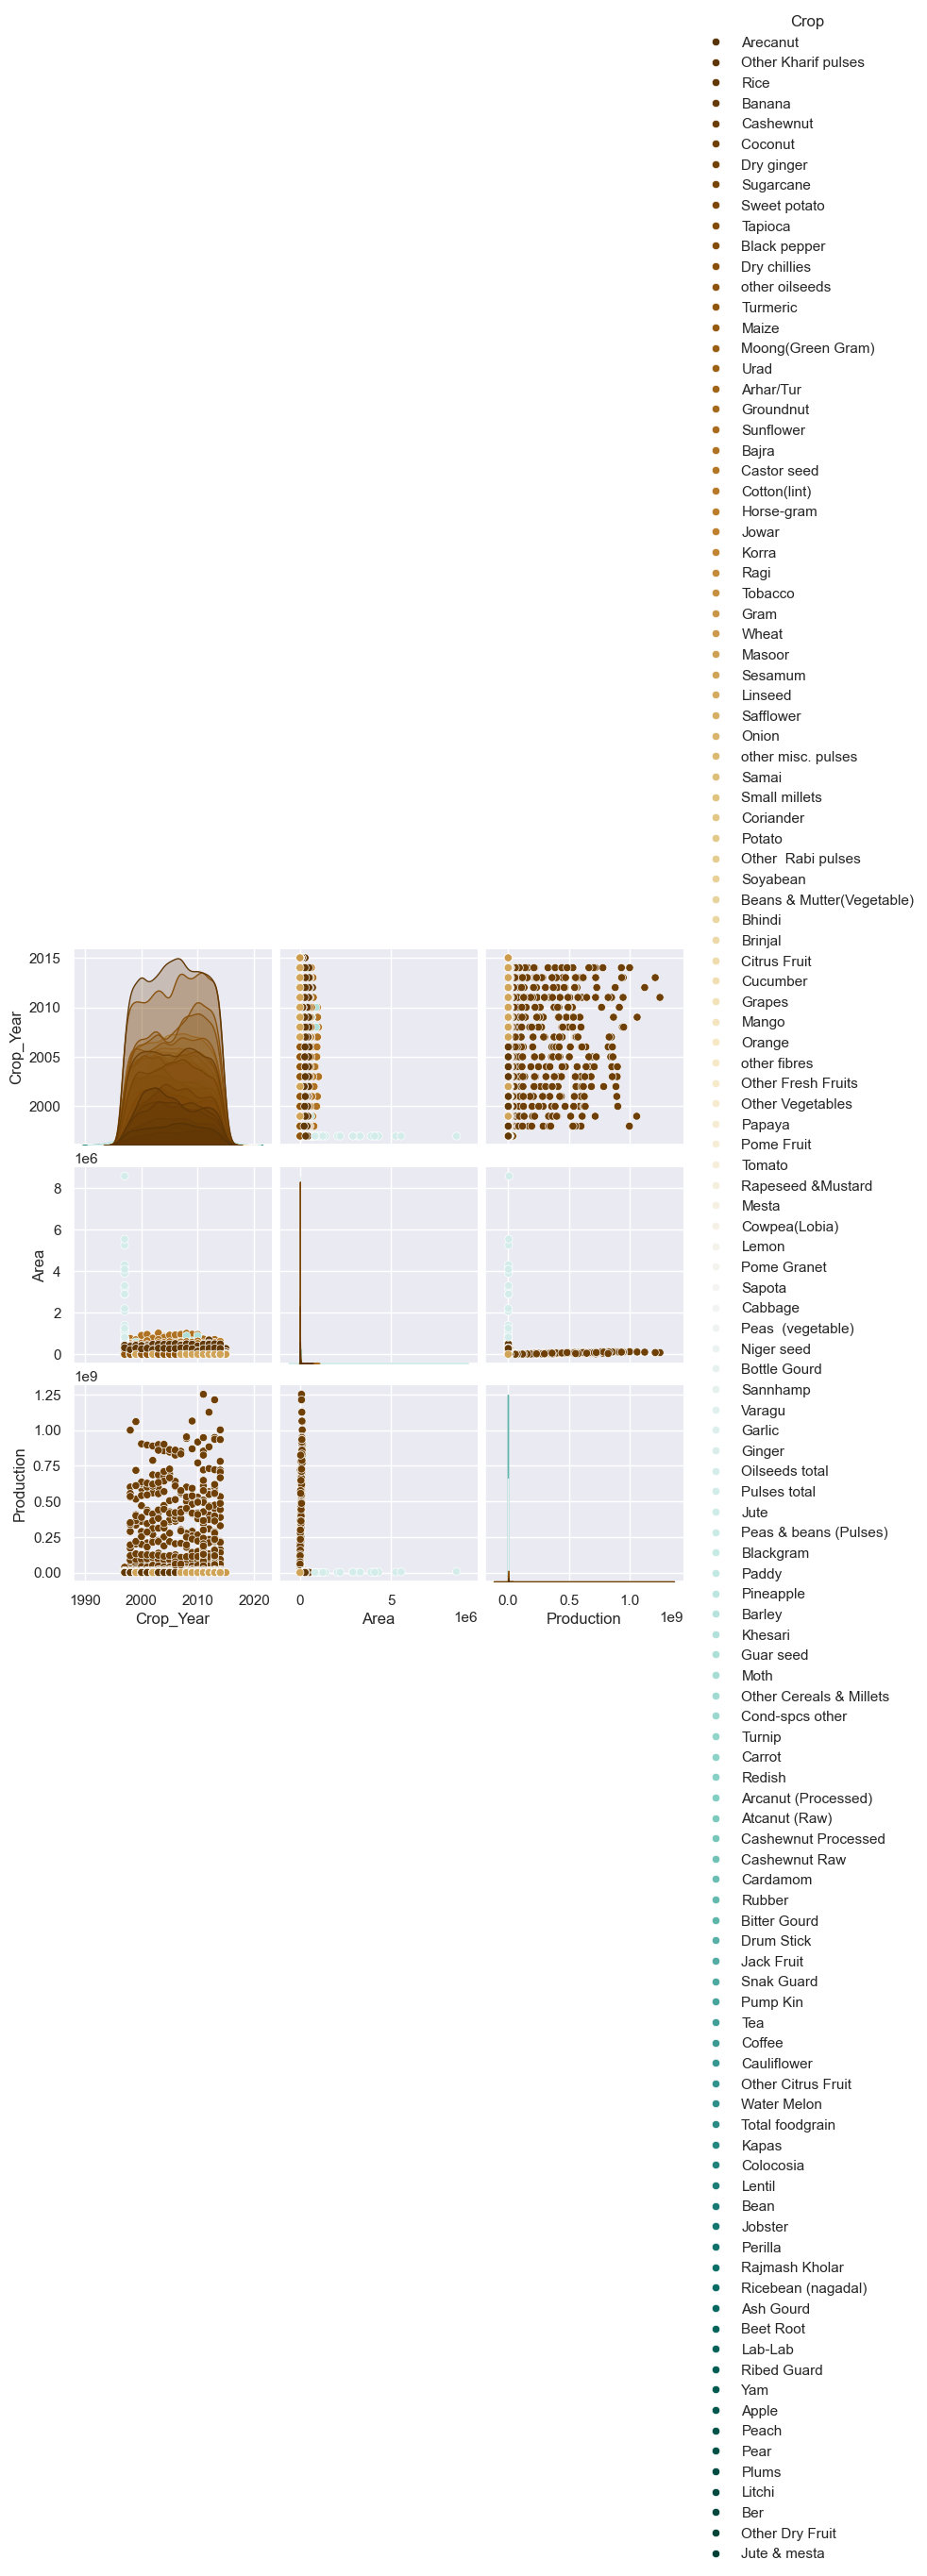

In [34]:
sns.pairplot(data=df,hue='Crop',kind='scatter',palette='BrBG')

<Axes: xlabel='Crop_Year'>

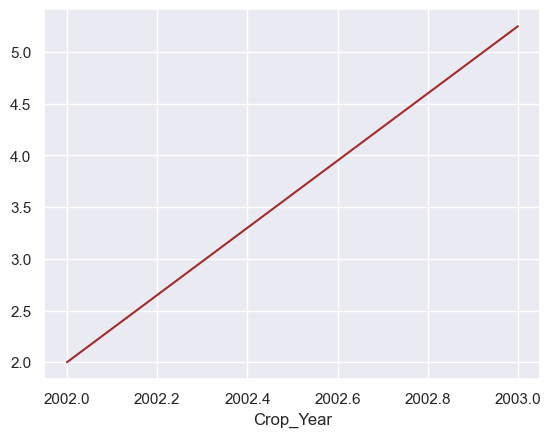

In [35]:
df2=df[df['Crop']=='Litchi']
df2.groupby('Crop_Year')['Area'].mean().plot(color='brown')

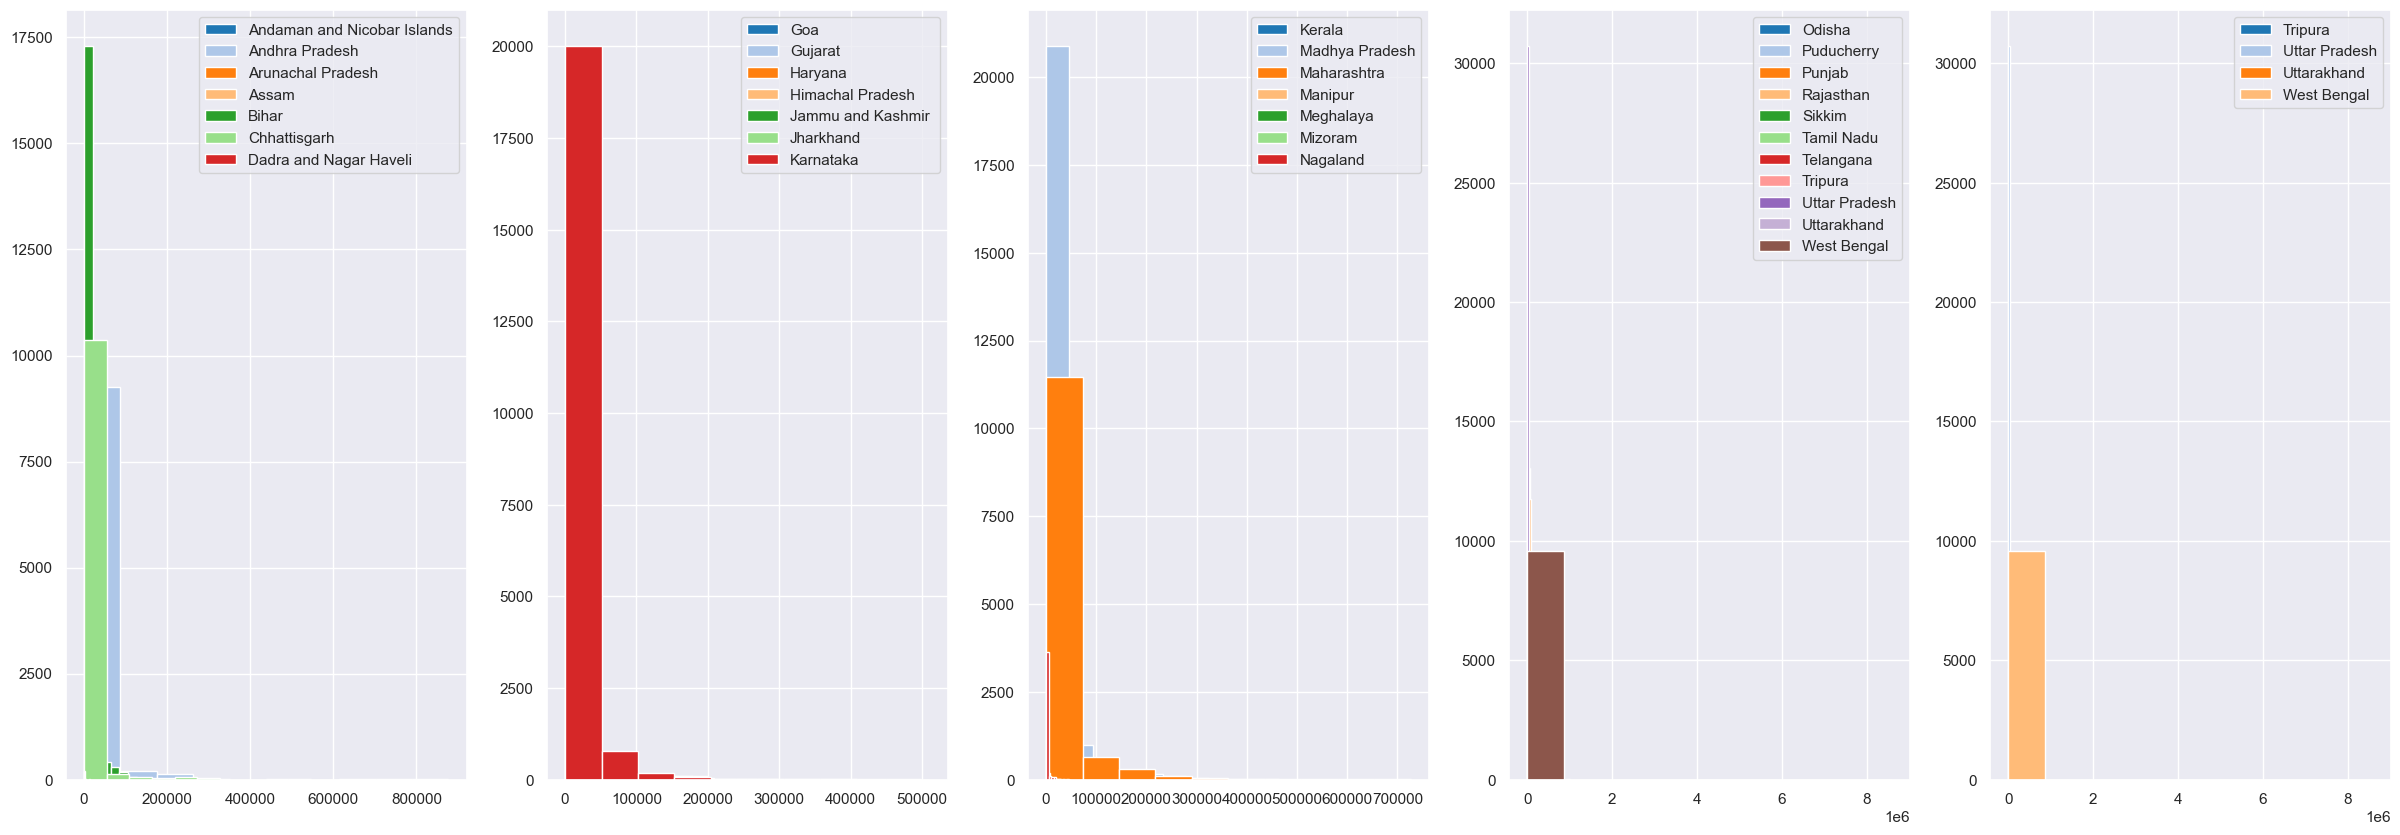

In [36]:
palette = sns.color_palette('tab20', 22, as_cmap=True)
num_plots = 5
areas_per_plot = 7

unique_areas = sorted(df['State_Name'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i + areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:] 
fig, axs = plt.subplots(ncols=num_plots, figsize=(30, 10))

for plot_idx, ax in enumerate(axs):
    if plot_idx < len(area_chunks): 
        plot_df = df[df['State_Name'].isin(area_chunks[plot_idx])]
        for idx, area in enumerate(plot_df['State_Name'].unique()):
            data = plot_df[plot_df['State_Name'] == area]
            ax.hist(data['Area'], facecolor=palette(idx), label=area)

        ax.legend()

plt.show()


In [37]:
for i in range(min(len(area_chunks), 6)):
    plot_df = df[df['State_Name'].isin(area_chunks[i])]
    dk = plot_df.groupby(['State_Name', 'Crop'])['Area'].mean().to_frame()
    dg = dk.sort_values(by=['Area'], ascending=True)
    display(dg.head())


Area
State_Name                  Crop                   
Andaman and Nicobar Islands Sunflower          1.95
Andhra Pradesh              Peas  (vegetable)  2.00
Dadra and Nagar Haveli      Coriander          5.00
                            Sunflower          5.00
Andhra Pradesh              Garlic             5.50

Area
State_Name         Crop               
Haryana            Soyabean   2.500000
Jammu and Kashmir  Ginger     3.000000
                   Coriander  4.500000
                   Turmeric   5.545455
Haryana            Tobacco    7.333333

Area
State_Name     Crop                  
Kerala         Wheat         1.000000
Madhya Pradesh Cashewnut     1.000000
Kerala         Soyabean      4.666667
Manipur        Kapas         5.000000
               Bitter Gourd  6.100000

Area
State_Name Crop                  
Tamil Nadu Jute          1.500000
Puducherry Sweet potato  1.600000
           Sunflower     2.000000
Rajasthan  Banana        2.133333
Tamil Nadu Apple         2.250000

Area
State_Name    Crop                  
Uttarakhand   Jowar         3.000000
Uttar Pradesh Castor seed   4.571429
Uttarakhand   Bajra         9.333333
Uttar Pradesh Moth         12.099291
              Jute         12.181818

In [38]:
for i in range(min(len(area_chunks), 6)):
    plot_df = df[df['State_Name'].isin(area_chunks[i])]
    dk = plot_df.groupby(['State_Name', 'Crop'])['Area'].mean().to_frame()
    dg = dk.sort_values(by=['Area'], ascending=False)
    display(dg.head())

Area
State_Name     Crop                    
Chhattisgarh   Rice       198443.972789
Andhra Pradesh Rice        96774.035343
Bihar          Wheat       55913.920236
Andhra Pradesh Groundnut   53324.391398
Bihar          Rice        36038.328964

Area
State_Name Crop                         
Gujarat    Oilseeds total  152781.894737
Haryana    Wheat           119037.643533
Gujarat    Cotton(lint)    100827.217125
Haryana    Rice             56957.357377
Gujarat    Groundnut        43252.554745

Area
State_Name     Crop                       
Maharashtra    Cotton(lint)  116696.873118
Madhya Pradesh Soyabean      105245.870000
               Wheat          92525.283582
Maharashtra    Jowar          79701.342857
               Soyabean       76210.348008

Area
State_Name    Crop                         
West Bengal   Oilseeds total   2.822672e+06
              Pulses total     1.074022e+06
Uttar Pradesh Total foodgrain  3.233297e+05
Punjab        Wheat            1.838402e+05
Rajasthan     Bajra            1.508507e+05

Area
State_Name    Crop                         
West Bengal   Oilseeds total   2.822672e+06
              Pulses total     1.074022e+06
Uttar Pradesh Total foodgrain  3.233297e+05
              Wheat            1.322466e+05
West Bengal   Rice             1.052564e+05

In [39]:
dk=df.groupby(['State_Name','Crop'])['Area'].mean().to_frame()
dk.sort_values(by=['Area'],ascending=False)

Area
State_Name                  Crop                         
West Bengal                 Oilseeds total   2.822672e+06
                            Pulses total     1.074022e+06
Uttar Pradesh               Total foodgrain  3.233297e+05
Chhattisgarh                Rice             1.984440e+05
Punjab                      Wheat            1.838402e+05
...                                                   ...
Andaman and Nicobar Islands Sunflower        1.950000e+00
Puducherry                  Sweet potato     1.600000e+00
Tamil Nadu                  Jute             1.500000e+00
Kerala                      Wheat            1.000000e+00
Madhya Pradesh              Cashewnut        1.000000e+00

[1248 rows x 1 columns]

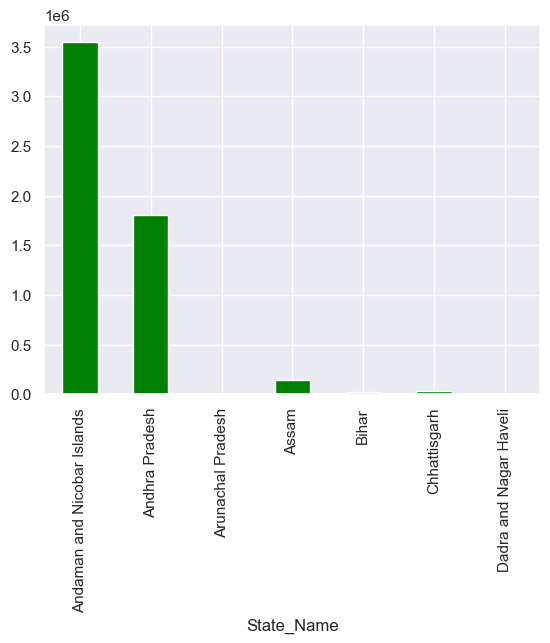

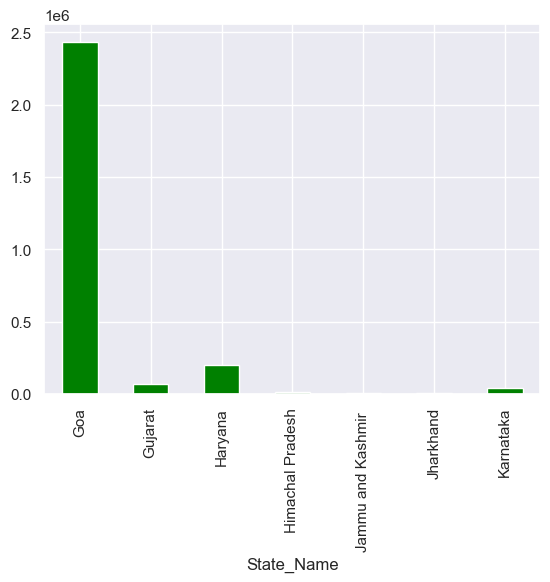

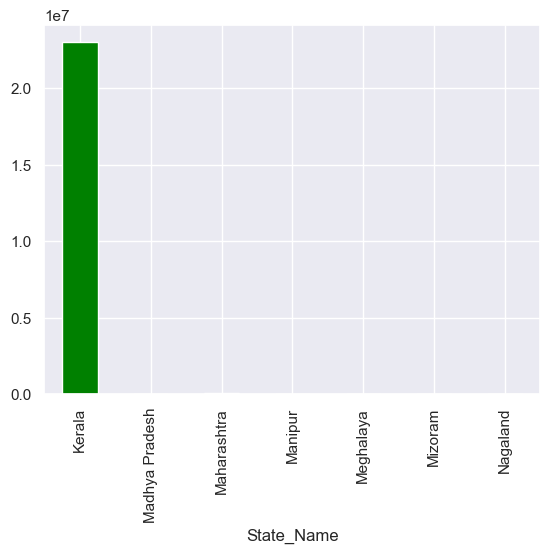

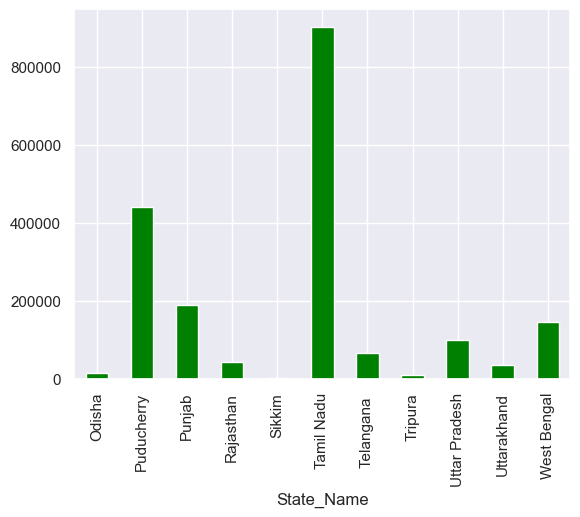

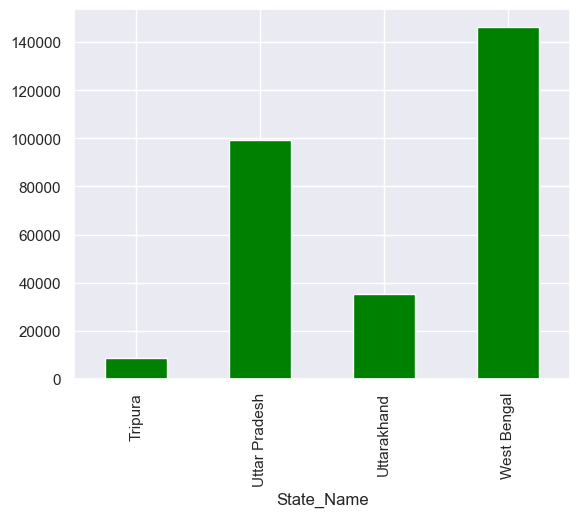

In [40]:
#Least produced item: sorghum and soybeans
for i in range(min(len(area_chunks), 7)):
    plot_df = df[df['State_Name'].isin(area_chunks[i])]
    plot_df.groupby(['State_Name'])['Production'].mean().plot(kind='bar', rot=0, color='green')
    plt.xticks(rotation=90)
    plt.show()


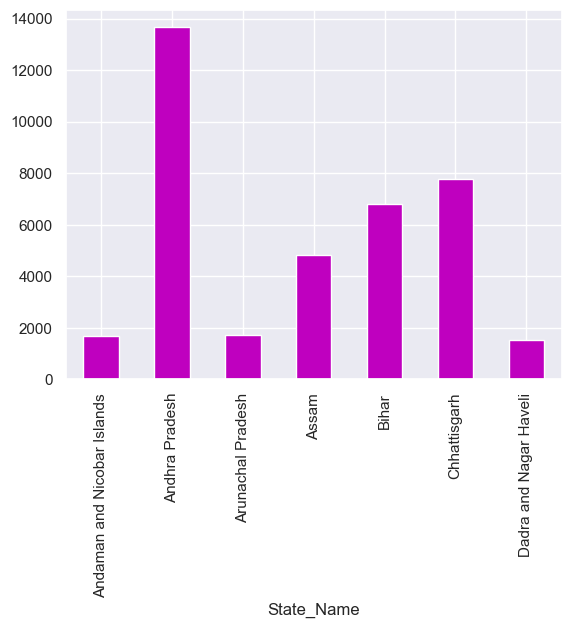

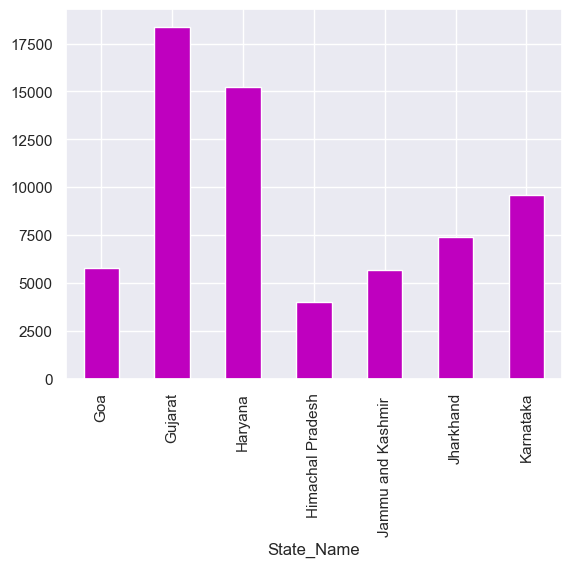

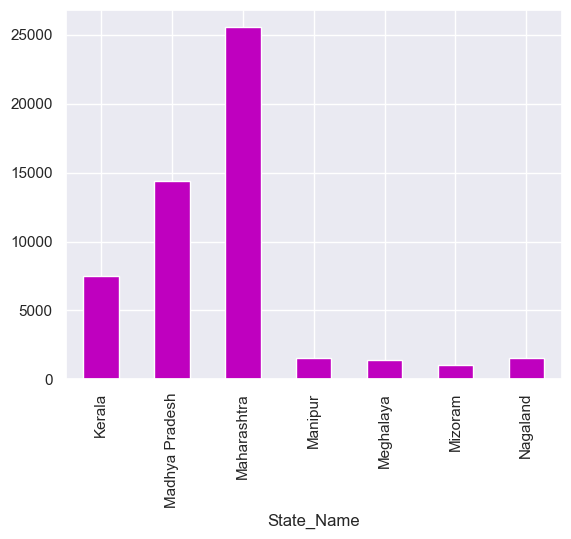

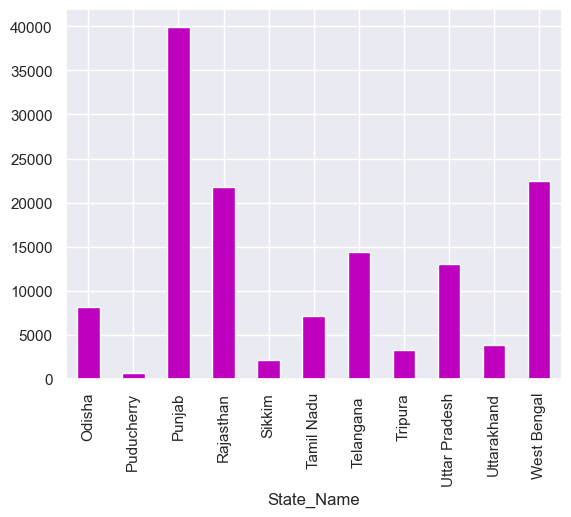

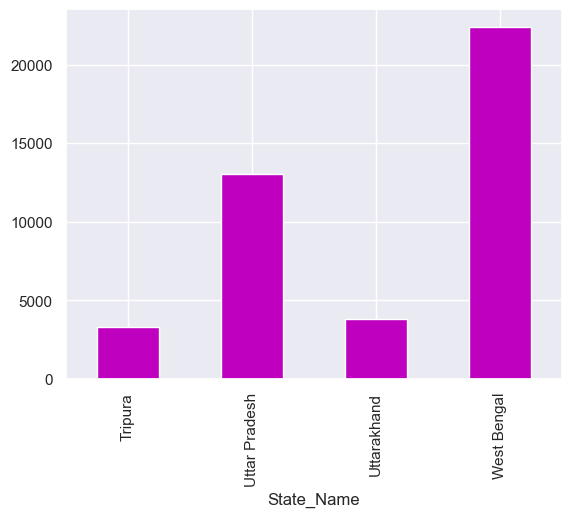

In [41]:
for i in range(min(len(area_chunks), 7)):
    plot_df = df[df['State_Name'].isin(area_chunks[i])]
    plot_df.groupby(['State_Name'])['Area'].mean().plot(kind='bar', rot=0, color='m')
    plt.xticks(rotation=90)
    plt.show()


maximum area are covered by West Bengal(>25000),Punjab(40000),Mahaashtra(>25000),Gujarat(>17500),Andra Pradesh(>13500)
minnimum area is covered by Puducherry,Mizoram,Meghalaya nearly of 1000

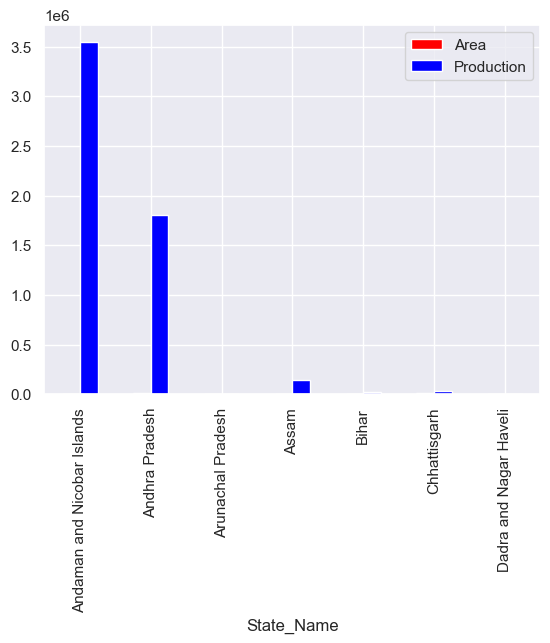

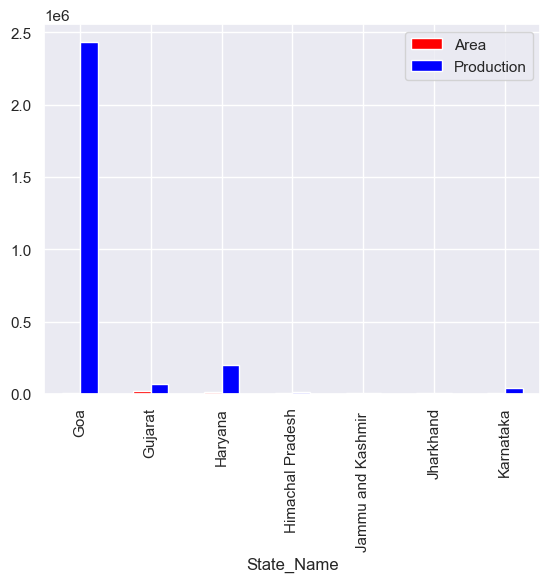

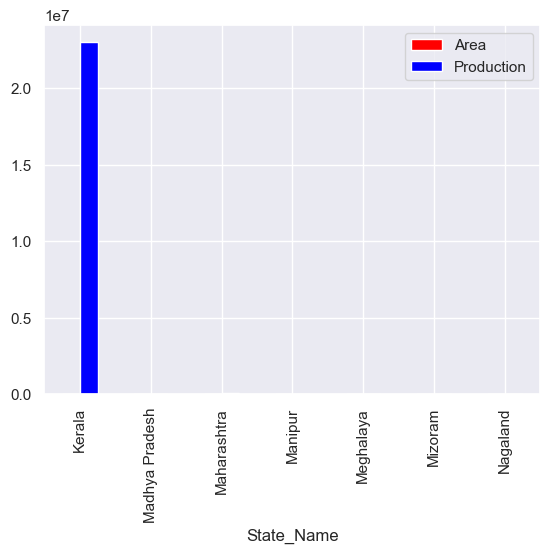

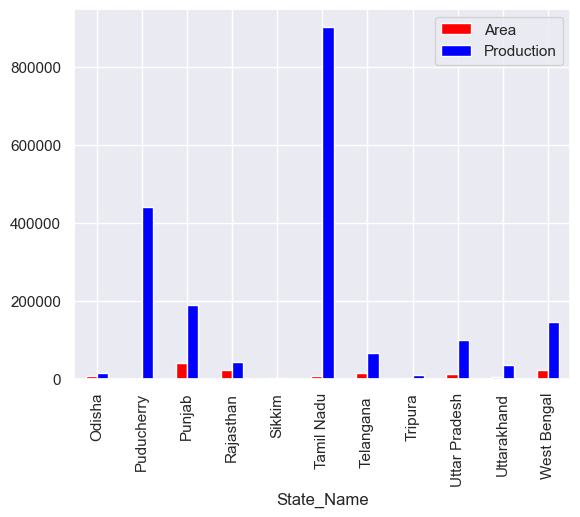

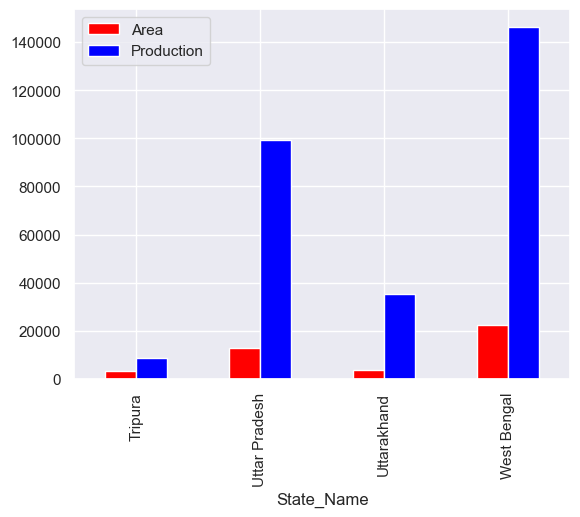

In [42]:
for i in range(min(len(area_chunks), 6)):
    plot_df = df[df['State_Name'].isin(area_chunks[i])]
    plot_df.groupby('State_Name')[['Area', 'Production']].mean().plot(kind='bar', rot=0, color=['Red','Blue'])
    plt.xticks(rotation=90)
    plt.show()


In [43]:

px.scatter(df, x='Area', y='Production',color="Crop",color_discrete_sequence=colorss.greens)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [45]:
feature_df= datacorr[['Crop_Year','Area','State_Name','District_Name','Season','Crop']]
X=np.asarray(feature_df)
X[0:6]

array([[2.0000e+03, 1.2540e+03, 0.0000e+00, 4.2600e+02, 1.0000e+00,
        2.0000e+00],
       [2.0000e+03, 2.0000e+00, 0.0000e+00, 4.2600e+02, 1.0000e+00,
        7.4000e+01],
       [2.0000e+03, 1.0200e+02, 0.0000e+00, 4.2600e+02, 1.0000e+00,
        9.5000e+01],
       [2.0000e+03, 1.7600e+02, 0.0000e+00, 4.2600e+02, 4.0000e+00,
        7.0000e+00],
       [2.0000e+03, 7.2000e+02, 0.0000e+00, 4.2600e+02, 4.0000e+00,
        2.2000e+01],
       [2.0000e+03, 1.8168e+04, 0.0000e+00, 4.2600e+02, 4.0000e+00,
        2.8000e+01]])

In [47]:
datacorr['Production'] = datacorr['Production'].astype('int')
y=np.asarray(datacorr['Production'])
y[0:6]

array([    2000,        1,      321,      641,      165, 65100000])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The accuracy of the Linear Regression Model Train is 0.55
The accuracy of the  Linear Regression Model Test is 0.59


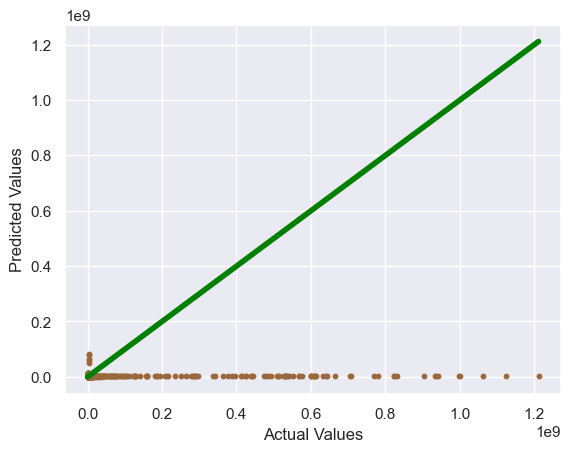

The accuracy of the Random Forest Model Train is 98.83
The accuracy of the  Random Forest Model Test is 94.02


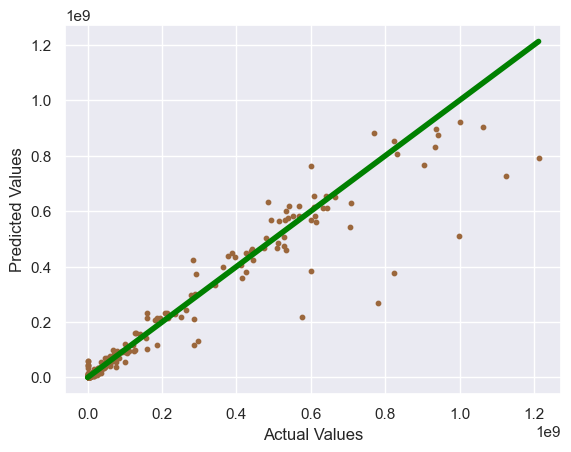

The accuracy of the Gradient Boost Model Train is 76.70
The accuracy of the  Gradient Boost Model Test is 78.37


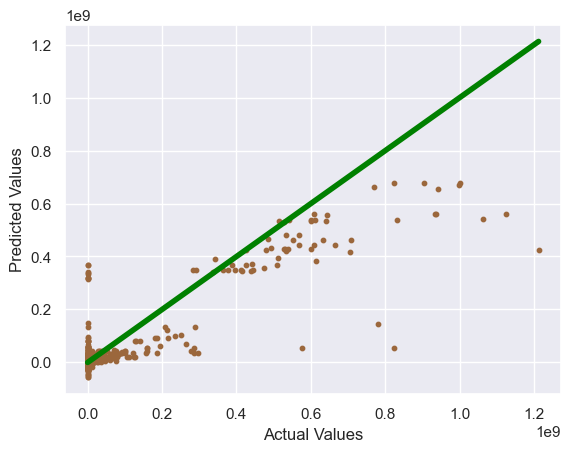

The accuracy of the XGBoost Model Train is 99.72
The accuracy of the  XGBoost Model Test is 96.03


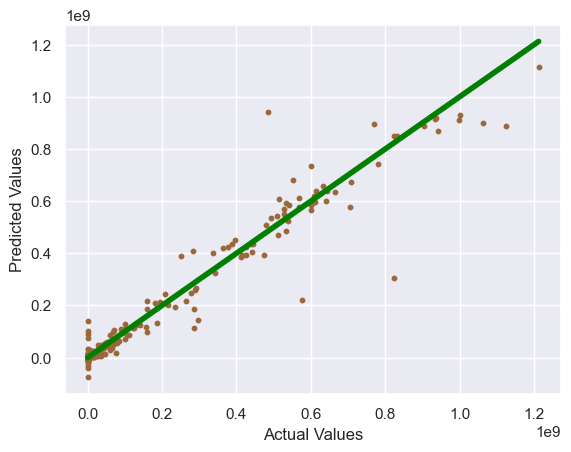

The accuracy of the KNN Model Train is 27.78
The accuracy of the  KNN Model Test is -6.37


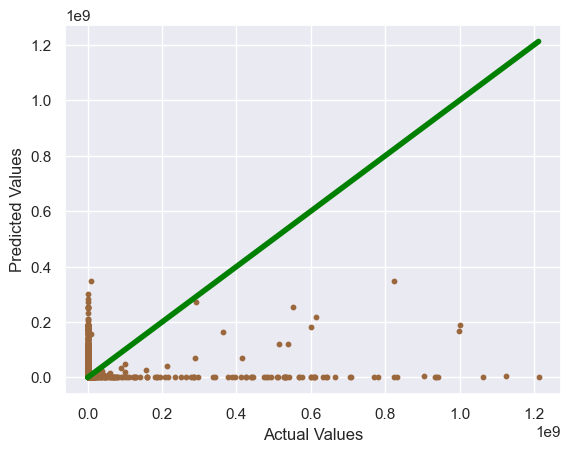

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 93.90


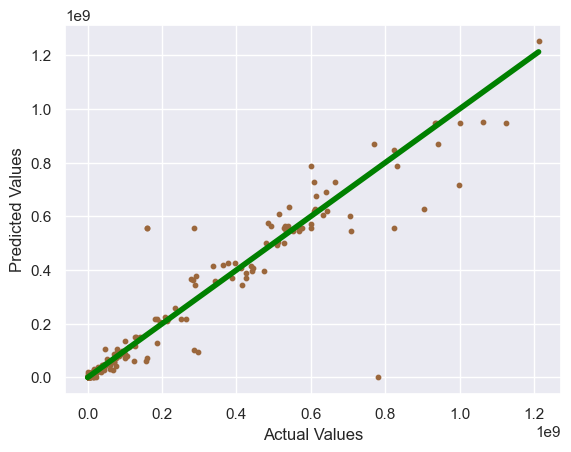

The accuracy of the Bagging Regressor Model Train is 98.84
The accuracy of the  Bagging Regressor Model Test is 94.13


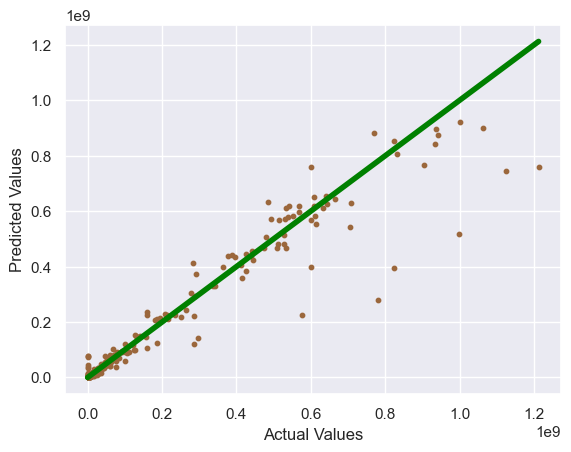

In [49]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')    
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
#     plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

# df_styled_worst = dff.style.highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)
# display(df_styled_worst)

In [50]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))
    
    print(name)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True)
    scores = cross_val_score(model, X, y, cv=kf)

    for fold, score in enumerate(scores):
        print(f"Fold {fold+1}: {score}")

mean_score = np.mean(scores)
print(f"Mean Score: {mean_score}")
print('-'*30)
df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'R2_score'])
df_styled_best = df.style.highlight_max(subset=['Accuracy','R2_score'], color='lightblue').highlight_min(subset=['MSE','MAE','MAPE'], color='lightblue').highlight_max(subset=['MSE','MAE','MAPE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)

Linear Regression
Fold 1: 0.00511955192547775
Fold 2: 0.005530137895887632
Fold 3: 0.005650550474684657
Fold 4: 0.004275493407796316
Fold 5: 0.006504324639966974
Random Forest
Fold 1: 0.9466040106853812
Fold 2: 0.9026727904573686
Fold 3: 0.924469797033009
Fold 4: 0.9075505220411652
Fold 5: 0.9351361332584565
Gradient Boost
Fold 1: 0.7252197274689546
Fold 2: 0.6373579291803333
Fold 3: 0.8604057189032076
Fold 4: 0.7610457147916623
Fold 5: 0.7129249713909056
XGBoost
Fold 1: 0.9686386423127471
Fold 2: 0.9683505277406699
Fold 3: 0.9575367406331455
Fold 4: 0.8639512135653984
Fold 5: 0.8799139366916006
KNN
Fold 1: -0.06293565844471316
Fold 2: -0.14820285497251207
Fold 3: -0.0361474112968343
Fold 4: -0.2608156200299321
Fold 5: -0.10008012518649889
Decision Tree
Fold 1: 0.7270159110462453
Fold 2: 0.7117069590288594
Fold 3: 0.918765941003462
Fold 4: 0.9741156774596879
Fold 5: 0.9613836120122755
Bagging Regressor
Fold 1: 0.8065568722605343
Fold 2: 0.9093986644129695
Fold 3: 0.9372379860366666
Fol